# Assignment 1 Question 13

## Dogs of Zurich

### 1.Introduction

**Description:** The dataset contains information on dog owners and the dogs they own in the city of Zürich. It is a simple dataset that allows for some easy exploration on preferences by gender, age, year or area of the city. I chose this dataset because I lived in Zürich and I like dogs so I thought it would be interesting to explore it and maybe derive some insights from the data.

**Source:** https://www.kaggle.com/kmader/dogs-of-zurich/data

**Areas of exploration:**
- What kinds of dogs do people that live in Zürich own?
- What are the most popular colours for dogs?
- Are there significant differences in terms of races owned by males vs females and people from different ages?

### 2.Data Cleaning

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
excel_file = pd.read_csv('20170308hundehalter.csv')
dogs = pd.DataFrame(excel_file)

We will inspect the data to get a glimpse of its structure. We would like to identify what attributes can be helpful, which ones are not and patterns of missingness. Since our data is categorical, there is no need to look for outliers.

In [23]:
dogs.head(5)

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,61-70,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,171,61-70,m,3.0,31.0,Berner Sennenhund,NaN,NaN,NaN,I,2009,m,tricolor
2,574,61-70,w,2.0,23.0,Mischling gross,NaN,NaN,NaN,I,2013,w,schwarz
3,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
4,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz


In [24]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7155 entries, 0 to 7154
Data columns (total 13 columns):
HALTER_ID           7155 non-null int64
ALTER               7154 non-null object
GESCHLECHT          7155 non-null object
STADTKREIS          7154 non-null float64
STADTQUARTIER       7154 non-null float64
RASSE1              7155 non-null object
RASSE1_MISCHLING    618 non-null object
RASSE2              543 non-null object
RASSE2_MISCHLING    0 non-null float64
RASSENTYP           7155 non-null object
GEBURTSJAHR_HUND    7155 non-null int64
GESCHLECHT_HUND     7155 non-null object
HUNDEFARBE          7155 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 726.8+ KB


- After a first glimpse to the data, it seems that some columns would not be very useful, such as secondary race or whether a dog is mixed race. We will proceed and remove them. 
- Other than this, the dataset seems pretty complete. There only seems to be a very small amount of observations with NAs, which we will remove as well.

In [25]:
dogs = dogs.drop(['RASSE1_MISCHLING', 'RASSE2', "RASSE2_MISCHLING"], axis = 1)
dogs = dogs.dropna()

In [26]:
dogs.shape

(7154, 10)

### 3.Exploratory Data Analysis

We will first start by checking what are the most popular dog breeds in the dataset.

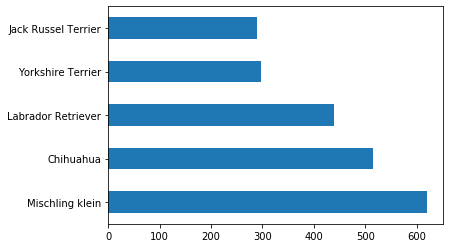

In [29]:
dogs['RASSE1'].value_counts()[:5].plot(kind='barh')

- We can observe that the most popular dog breeds in Zürich are small mixed breed dogs, Chihuauas and Labrador Retrievers.

We can now explore whether there are differences between dog breeds owned among male or female owners.

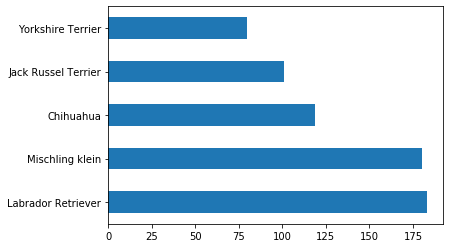

In [42]:
dogs[dogs['GESCHLECHT']=='m']['RASSE1'].value_counts()[:5].plot(kind='barh')

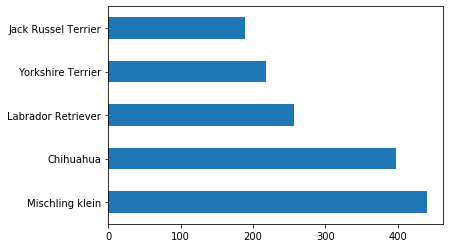

In [41]:
dogs[dogs['GESCHLECHT']=='w']['RASSE1'].value_counts()[:5].plot(kind='barh')

- Female dog owners seem to be representative of the whole population and they seem to favour smaller dog breeds.
- Labrador Retrievers are the most popular dog breed among male dog owners.

Lastly, we will end by exploring the most popular colours among dog owners in Zürich.

In [50]:
dogs.groupby(['HUNDEFARBE']).size().reset_index(name='counts').sort_values(by=['counts'], ascending = False)[0:10]

,HUNDEFARBE,counts
116,schwarz,776
145,tricolor,696
147,weiss,581
29,braun,536
137,schwarz/weiss,458
124,schwarz/braun,371
2,beige,326
42,braun/weiss,240
151,weiss/braun,206
15,black/tan,160


- The most popular colour is definitely black, either by itself or combined with other colours.
- There seems to be a great amount of colour combinations.
- Other popular colours are white, brown or beige.

### 4.Conclusions

We could derive some interesting insights from our small analysis of the dataset:
- Dog owners in Zürich tend to favour smaller types of dogs such as mixed races or Chihuahuas. This seems reasonable given the lack of space in the city and that most people live in apartments.
- There are differences between female and male dog owners. Female dog owners are representative of the population but male owners tend to favour a bit more larger dog breeds, especially Labrador Retrievers.
- The most popular colours are dark ones, especially combinations of black.